In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("data.csv", encoding='ISO-8859-1')

In [17]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [19]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


<Axes: >

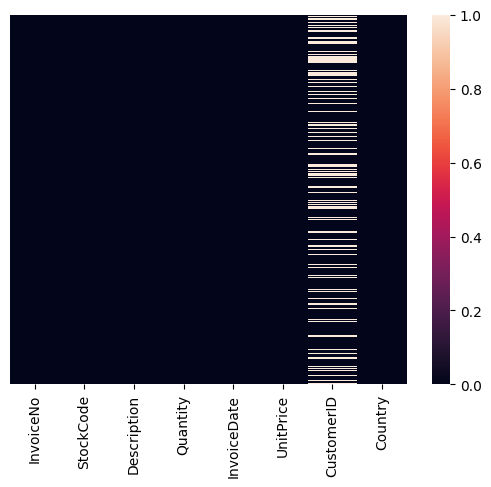

In [21]:
sns.heatmap(df.isnull(),yticklabels=False)

In [24]:
df = df.dropna(subset='CustomerID')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [29]:
df['InvoiceNo'].astype(str).str.startswith('C').value_counts()

InvoiceNo
False    397924
True       8905
Name: count, dtype: int64

In [30]:
df = df[(df['Quantity'] > 0) & (~df['InvoiceNo'].astype(str).str.startswith('C'))]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [32]:
df['LineTotal'] = df['Quantity'] * df['UnitPrice']

In [33]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,LineTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [36]:
#Reference date for Recency (day after the max date)
ref_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [37]:
rfm = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda s: (ref_date - s.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('LineTotal', 'sum'),
    Country=('Country', 'first')  # optional for slicing later
).reset_index()

In [39]:
rfm.head(15)

,CustomerID,Recency,Frequency,Monetary,Country
0,12346.0,326,1,77183.60,United Kingdom
1,12347.0,2,7,4310.00,Iceland
2,12348.0,75,4,1797.24,Finland
3,12349.0,19,1,1757.55,Italy
4,12350.0,310,1,334.40,Norway
5,12352.0,36,8,2506.04,Norway
6,12353.0,204,1,89.00,Bahrain
7,12354.0,232,1,1079.40,Spain
8,12355.0,214,1,459.40,Bahrain
9,12356.0,23,3,2811.43,Portugal


In [41]:
q_hi = rfm['Monetary'].quantile(0.99)
rfm = rfm[rfm['Monetary'] <= q_hi].copy()

In [43]:
rfm.head(15)

,CustomerID,Recency,Frequency,Monetary,Country
1,12347.0,2,7,4310.00,Iceland
2,12348.0,75,4,1797.24,Finland
3,12349.0,19,1,1757.55,Italy
4,12350.0,310,1,334.40,Norway
5,12352.0,36,8,2506.04,Norway
6,12353.0,204,1,89.00,Bahrain
7,12354.0,232,1,1079.40,Spain
8,12355.0,214,1,459.40,Bahrain
9,12356.0,23,3,2811.43,Portugal
10,12357.0,33,1,6207.67,Switzerland


In [53]:
rfm_model = rfm[['Recency', 'Frequency', 'Monetary']].copy()
rfm[rfm['Monetary']<1]

,CustomerID,Recency,Frequency,Monetary,Country
685,13256.0,14,1,0.0,United Kingdom


In [55]:
from sklearn.preprocessing import StandardScaler

# Log transform skewed features (add 1 to avoid log(0))
rfm_model['Frequency'] = np.log1p(rfm_model['Frequency'])
rfm_model['Monetary']  = np.log1p(rfm_model['Monetary'])

scaler = StandardScaler()
X = scaler.fit_transform(rfm_model)


In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
sil_scores = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)                      # elbow
    sil_scores.append(silhouette_score(X, labels))    # silhouette

for k, inertia, sil in zip(K_range, inertias, sil_scores):
    print(f"k={k}, Inertia={inertia:.2f}, Silhouette={sil:.2f}")

# Assuming you already have inertias, sil_scores, and K_range
results = pd.DataFrame({
    'K': list(K_range),
    'Inertia': inertias,
    'Silhouette Score': sil_scores
})

# Round for neatness
results = results.round(3)

# Export to CSV
results.to_csv("clustering_metrics.csv", index=False)    

k=2, Inertia=6650.07, Silhouette=0.41
k=3, Inertia=4151.22, Silhouette=0.42
k=4, Inertia=3141.41, Silhouette=0.37
k=5, Inertia=2699.65, Silhouette=0.34
k=6, Inertia=2325.10, Silhouette=0.33
k=7, Inertia=2106.48, Silhouette=0.32
k=8, Inertia=1913.46, Silhouette=0.30
k=9, Inertia=1774.25, Silhouette=0.29


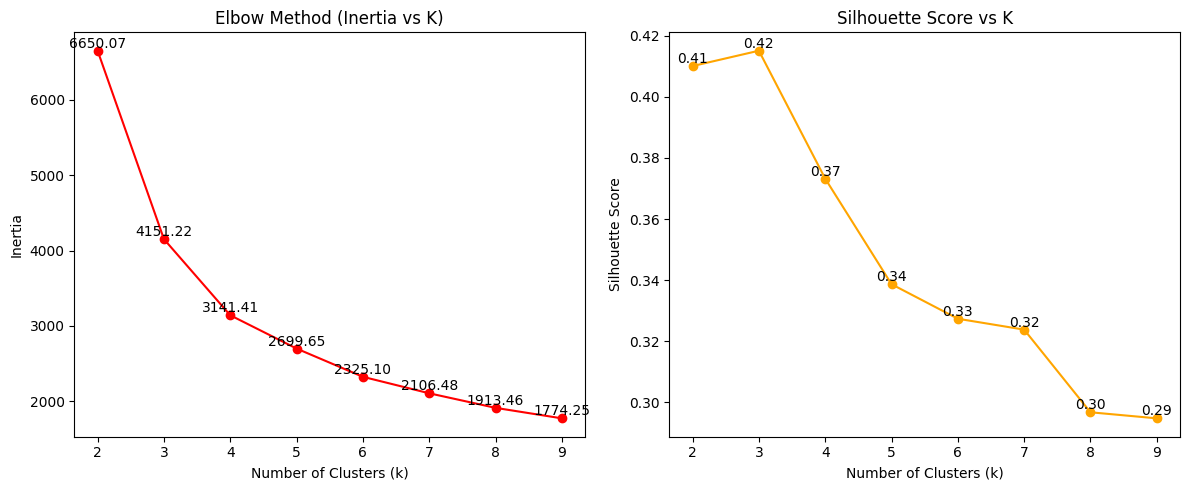

<Figure size 640x480 with 0 Axes>

In [73]:
import matplotlib.pyplot as plt

# Replace inertias and sil_scores with your calculated values
K_range = range(2, 10)

plt.figure(figsize=(12,5))

# Elbow Curve
plt.subplot(1,2,1)
plt.plot(K_range, inertias, marker='o',color='red')
for k, inertia in zip(K_range, inertias):
    plt.text(k, inertia, f"{inertia:.2f}", ha='center', va='bottom')
plt.title("Elbow Method (Inertia vs K)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")

# Silhouette Score Plot
plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, marker='o', color='orange')
for k, sil in zip(K_range, sil_scores):
    plt.text(k, sil, f"{sil:.2f}", ha='center', va='bottom')
plt.title("Silhouette Score vs K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()
plt.savefig("elbow_method.png", dpi=300, bbox_inches="tight")

In [65]:
best_k = 4 
kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(X)


In [66]:
cluster_profile = rfm.groupby('Cluster').agg(
    Recency=('Recency', 'mean'),
    Frequency=('Frequency', 'mean'),
    Monetary=('Monetary', 'mean'),
    Count=('CustomerID', 'count')
).round(2).sort_values('Monetary', ascending=False)

cluster_profile


,Recency,Frequency,Monetary,Count
Cluster,,,,
3,22.50,11.91,4741.78,692
1,49.10,3.75,1407.09,1400
0,260.92,1.36,381.26,922
2,58.91,1.45,356.83,1281


In [68]:
segment_names = {
    0: "Inactive Customers",
    1: "Frequent Shoppers",
    2: "At-Risk",
    3: "Loyal High Spenders"
}
rfm['Segment'] = rfm['Cluster'].map(segment_names)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Country,Cluster,Segment
1,12347.0,2,7,4310.00,Iceland,3,Loyal High Spenders
2,12348.0,75,4,1797.24,Finland,1,Frequent Shoppers
3,12349.0,19,1,1757.55,Italy,1,Frequent Shoppers
4,12350.0,310,1,334.40,Norway,0,Inactive Customers
5,12352.0,36,8,2506.04,Norway,3,Loyal High Spenders


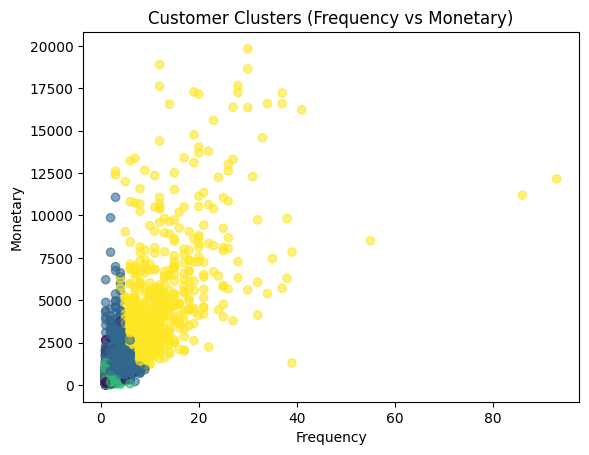

In [69]:
import matplotlib.pyplot as plt

# Scatter F vs M colored by cluster (use original non-scaled/logged for readability)
plt.figure()
plt.scatter(rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'], alpha=0.6)
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.title("Customer Clusters (Frequency vs Monetary)")
plt.show()


In [70]:
rfm[['CustomerID','Recency','Frequency','Monetary','Country','Cluster','Segment']].to_csv(
    "customer_segments.csv", index=False
)

cluster_profile.reset_index().to_csv("cluster_profile.csv", index=False)
